First 5 rows of the dataset:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   19                  15                      39
1           2   21                  15                      81
2           3   20                  16                       6
3           4   23                  16                      77
4           5   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None

Missing Values in Dataset:
CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Scor

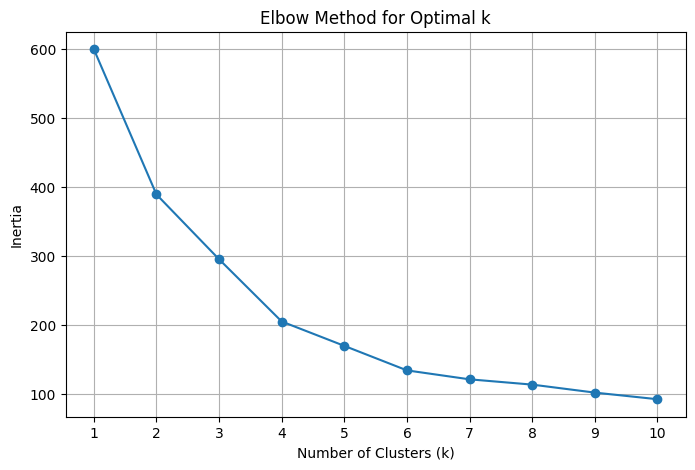


First 5 rows with cluster labels:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1   19                  15                      39        2
1           2   21                  15                      81        2
2           3   20                  16                       6        2
3           4   23                  16                      77        2
4           5   31                  17                      40        2


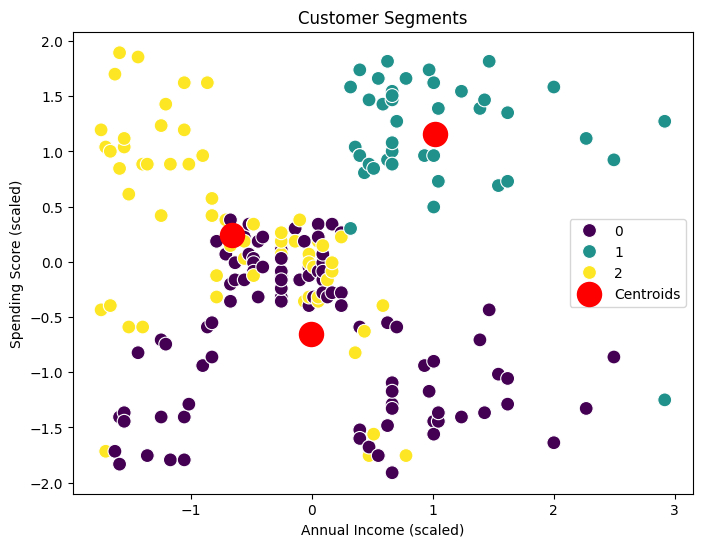

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


dataset_path = r"C:\Users\Unnati\Downloads\Mall_Customers.csv.xlsx"
df = pd.read_excel(dataset_path)


print("First 5 rows of the dataset:")
print(df.head())


print("\nDataset Info:")
print(df.info())


print("\nMissing Values in Dataset:")
print(df.isnull().sum())


features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


print("\nFirst 5 rows of scaled features:")
print(scaled_features[:5])


inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)


df['Cluster'] = cluster_labels


print("\nFirst 5 rows with cluster labels:")
print(df.head())


plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 1], 
    y=scaled_features[:, 2],  
    hue=cluster_labels,
    palette='viridis',
    s=100
)


plt.scatter(
    kmeans.cluster_centers_[:, 1],
    kmeans.cluster_centers_[:, 2],
    s=300,
    c='red',
    label='Centroids'
)

plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()
